In [1]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import imutils

In [2]:
img = cv.imread("dataset_testing/StateLineWeir_20170730_Farrell_147.jpg")

# filter to reduce noise
img = cv.medianBlur(img, 3)

In [3]:

# flatten the image
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

# meanshift
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth, max_iter=800, bin_seeding=True)
ms.fit(flat_image)
labeled=ms.labels_


# get number of segments
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])

# get the average color of each segment
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
res = avg[labeled]
result = res.reshape((img.shape))

Number of segments:  11


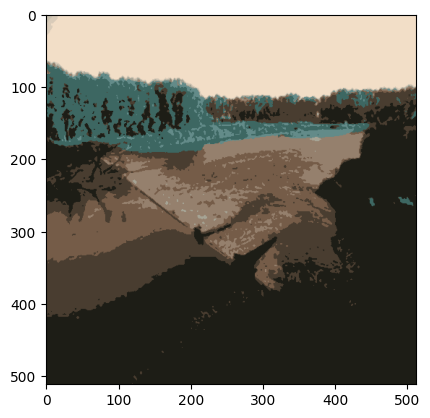

In [4]:
# show the result
plt.imshow(result)

In [5]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv.kmeans(data, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [6]:
img = cv.imread("dataset_testing/StateLineWeir_20160527_Farrell_406.JPG")
img_2 = cv.imread("dataset_testing/StateLineWeir_20170730_Farrell_147.jpg")

In [15]:
resized = cv.resize(img_2, (320, 320), interpolation = cv.INTER_AREA)

In [18]:
rotated_image = imutils.rotate(resized, angle=-35)

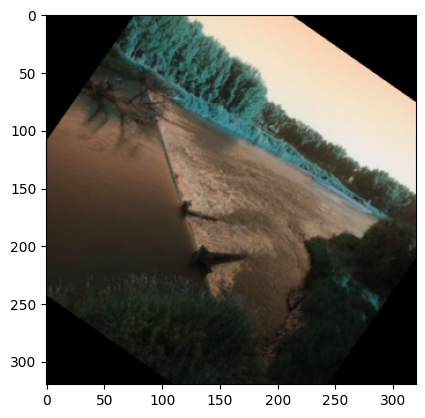

In [19]:
plt.imshow(rotated_image)

In [10]:
total_colors = 50
img_cartoon = color_quantization(img_2, total_colors)
img_cartoon.shape

(512, 512, 3)

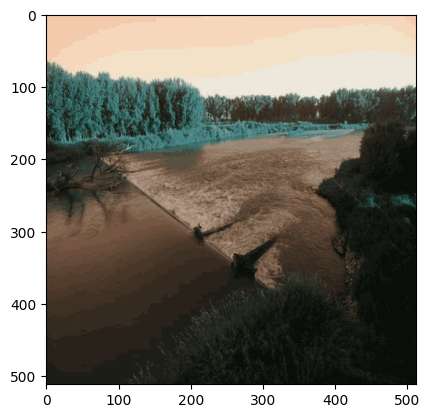

In [11]:
plt.imshow(img_cartoon)

In [12]:
def edge_mask(img, line_size, blur_value):
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  gray_blur = cv.medianBlur(gray, blur_value)
  edges = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, line_size, blur_value)
  return edges

In [13]:
line_size = 13
blur_value = 9
edges = edge_mask(img_2, line_size, blur_value)

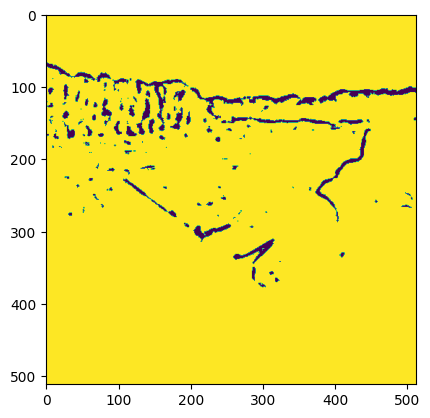

In [14]:
plt.imshow(edges)